<a href="https://colab.research.google.com/github/nafi-rahman/ML-AI/blob/main/Pytorch_fundamentals_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 00. Pytorch Fundementals

Resource :
#1. notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/

#2. Git: https://github.com/mrdbourke/pytorch-deep-learning

#3. discussion: https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

2.0.1+cu118


## Intro to tensors

### Creating tensors

https://pytorch.org/docs/stable/tensors.html

In [ ]:
#scalar

scalar = torch.tensor(7)

print(scalar.ndim)
print(scalar.item())

0
7


In [ ]:
# vector

vector = torch.tensor([7,7])
print(vector.ndim)
print(vector.shape)

1
torch.Size([2])


In [ ]:
# MATRIX

MATRIX = torch.tensor([[7,8],
                       [9,10]])

print(MATRIX.ndim)
print(MATRIX.shape)
print(f"num of 00: {MATRIX[0,0]}")


2
torch.Size([2, 2])
num of 00: 7


In [ ]:
# TENSOR

TENSOR = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [2, 4, 5]]])

print(TENSOR)
print("\n")
print(f"dimensions: {TENSOR.ndim}")
print(f"shape: {TENSOR.shape}")
print(f"second row of matrix: {TENSOR[0,1]}")

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])


dimensions: 3
shape: torch.Size([1, 3, 3])
second row of matrix: tensor([3, 6, 9])


# Random tensors
###### Random tensors are important to NN's cause NN's start with random values and adjust them as they learn.

`start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers`

In [ ]:
# Create a random tensor of size (3, 4)

random_tensor = torch.rand(3,4)
print(f"random tensor: \n{random_tensor}\n")
print(f"dimension: {random_tensor.ndim}")

random tensor: 
tensor([[0.5319, 0.3753, 0.6771, 0.5595],
        [0.3660, 0.7181, 0.6094, 0.4121],
        [0.7407, 0.0411, 0.1594, 0.9262]])

dimension: 2


In [ ]:
#Random tensor to similar shape to an image
random_image_tensor = torch.rand(size=(224,224,3)) #(224,224,224) -> (height, width, color channels)
print(f"dimension: {random_image_tensor.ndim}")
print(f"shape: {random_image_tensor.shape}")

dimension: 3
shape: torch.Size([224, 224, 3])


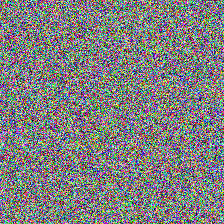

In [ ]:
#visualizing the random image
from PIL import Image

def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return Image.fromarray(tensor)

tensor_to_image(random_image_tensor)

# Zeros ad ones

In [ ]:
# create a tensor of all zeros

zeros = torch.zeros(size=(3,4))
print(f"tensor of 0's : \n{zeros}")

# create a tensor of all 1's

ones = torch.ones(size=(3,4))
print(f"tensor of 1's : \n{ones}")


tensor of 0's : 
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor of 1's : 
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [ ]:
print(f"dtype of tensor: {ones.dtype}")

dtype of tensor: torch.float32


In [ ]:
one_to_ten = torch.arange(start = 1, end=11, step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
#creating tensors like
ten_zeroes = torch.zeros_like(input=one_to_ten)
print(ten_zeroes)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


# Tensor Datatypes

**NOTE** Tensor datatypes is one of the 3 big errors that are common with Pytorhc and deeplearning.

1. Tensors not right datatype.
2. Tensors not right shape.
3. Tensors not on the right datatype.

In [ ]:
#float32 tensor

float32_tensor = torch.tensor([3.0,6.0,9.0],
                              dtype=None, #specific datatype to make the tensor with
                              device= None, #what device the tensor will be on(cpu,gpu,mps)
                              requires_grad = False #if this tensor needs gradiants to be meassured/tracked or not
                              )

print(float32_tensor.dtype)

torch.float32


In [ ]:
float_16_tensor = float32_tensor.type(torch.float16)
print(float_16_tensor)

tensor([3., 6., 9.], dtype=torch.float16)


In [ ]:
print(float_16_tensor * float32_tensor)
print((float_16_tensor * float32_tensor).dtype)

int32_tensor = float32_tensor.type(torch.int32)
print(int32_tensor * float32_tensor)
print((int32_tensor * float32_tensor).dtype)

tensor([ 9., 36., 81.])
torch.float32
tensor([ 9., 36., 81.])
torch.float32


# Getting information from tensors(tensor attributes)

1. how to get datatype? tensor.dtype
2. how to get shape? tensor.shape
3. how to get device? tensor.device



In [ ]:
some_tensor = torch.rand(3,4)

print(f"tensor: \n{some_tensor}\n")
print(f"dtype: {some_tensor.dtype}")
print(f"shape: {some_tensor.shape}")
print(f"device: {some_tensor.device}")

tensor: 
tensor([[0.7544, 0.9131, 0.5343, 0.7396],
        [0.2611, 0.1754, 0.1975, 0.1562],
        [0.2536, 0.5116, 0.9096, 0.0526]])

dtype: torch.float32
shape: torch.Size([3, 4])
device: cpu


#Manipulating Tensors/Tensor Operations
These operations are:

1. Addition

2. Substraction

3. Multiplication (element-wise)

4. Division

5. Matrix multiplication(http://matrixmultiplication.xyz/)

In [ ]:
#create tensor and add 10
tensor = torch.tensor([1,2,3,4])
print(f"before: {tensor} \n after: {tensor + 10}")
#create tensor and multiply 10
print(f"\n before: {tensor} \n after: {tensor * 10}")
#create tensor and subtract 10
print(f"\n before: {tensor} \n after: {tensor - 10}")
#create tensor and divide 10
print(f"\n before: {tensor} \n after: {tensor / 10}")


before: tensor([1, 2, 3, 4]) 
 after: tensor([11, 12, 13, 14])

 before: tensor([1, 2, 3, 4]) 
 after: tensor([10, 20, 30, 40])

 before: tensor([1, 2, 3, 4]) 
 after: tensor([-9, -8, -7, -6])

 before: tensor([1, 2, 3, 4]) 
 after: tensor([0.1000, 0.2000, 0.3000, 0.4000])


In [ ]:
#create tensor and matrix multiply with 10
%%time
print(f"\n before: {tensor} \n after(built in): {torch.matmul(tensor,tensor)}")


 before: tensor([1, 2, 3, 4]) 
 after(built in): 30
CPU times: user 1.65 ms, sys: 0 ns, total: 1.65 ms
Wall time: 1.66 ms


In [ ]:
%%time
val = 0
for i in range(len(tensor)):
  val += tensor[i] * tensor[i]
print(f"using own func {val}")

using own func 30
CPU times: user 3.06 ms, sys: 3 µs, total: 3.06 ms
Wall time: 2.74 ms


##Shapes for matrix multiplication

In [ ]:
tensor_a = torch.tensor([
    [1,2],
    [3,4],
    [5,6]
])

tensor_b = torch.tensor([
    [7,8],
    [9,10],
    [11,12]
])

tensor_c = torch.tensor([
    [13,14,15],
    [15,16,17]
])

print(f"shape of tensor a: \n{tensor_a.shape}")
print(f"shape of tensor b: \n{tensor_b.shape}")

print(torch.mm(tensor_a,tensor_c))

#this gives shape issue mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)
#To fix this we will use transpose which will switch the axis of a given tensor
print(f"\n{torch.mm(tensor_a,tensor_b.T)}")

shape of tensor a: 
torch.Size([3, 2])
shape of tensor b: 
torch.Size([3, 2])
tensor([[ 43,  46,  49],
        [ 99, 106, 113],
        [155, 166, 177]])

tensor([[ 23,  29,  35],
        [ 53,  67,  81],
        [ 83, 105, 127]])


#Tensor aggregation: Finding the min,max,mean,sum

In [ ]:
#creating a random tensor
tensor = torch.arange(0,100,10)
#find the min
print(f"min of tensor: \n{tensor.min()}\n")
#find the max
print(f"max of tensor: \n{tensor.max()}\n")
#find the mean(this will give an error cause tensor is currently long. to fix error we change the tensor type to float32)
print(f"mean of tensor: \n{tensor.type(torch.float32).mean()}\n")


min of tensor: 
0

max of tensor: 
90

mean of tensor: 
45.0

min of tensor: 
tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])



##argmax and argmin

returns the position/index of the max/min element

In [ ]:
#find the argmax
print(f"argmax: {tensor.argmax()}\n value of tensor at argmax: {tensor[tensor.argmax()]}\n")
#find the argmintor
print(f"argmin: {tensor.argmin()}\n value of tensor at argMIN: {tensor[tensor.argmin()]}\n")

argmax: 9
 value of tensor at argmax: 90

argmin: 0
 value of tensor at argMIN: 0



#Reshaping, Stacking, Squeezing, Unsqueezing....

* Reshape - reshapes tensors to a defined shape
* view - returns a view of input tensors of a certain shape while keeping memory of the original tensor
* Stacking - combining multipple tensors either vertical or horizontal or a certain dimension
* Squeeze - removes all `1` dimensions from a tensor
* Unsqueeze - adds a `1` dimension to a target tensor
* Permute - Return a view of the input with dimensions permuted (swapped) in a certain way

In [ ]:
#reshape
tensor = torch.arange(1.,10.)
print(f"original tensor: {tensor} \n shape: {tensor.shape}\n")

tensor_reshape = tensor.reshape(9,1)
tensor_reshape, tensor_reshape.shape

print(f"reshaped tensor: {tensor_reshape} \n shape: {tensor_reshape.shape}\n")

original tensor: tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]) 
 shape: torch.Size([9])

reshaped tensor: tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]]) 
 shape: torch.Size([9, 1])



In [ ]:
#change view
x = tensor.view(3,3)
print(f"tensor: {x} \n shape: {x.shape}\n")
#view shares the memory with original tensor,
#in other words x is just the original tensor in a different view
#if i change value in original tensor x will change too
print(f"original tensor 0th elm before: {tensor[0]}\n")
print(f"x tensor 0th elm before: {x[0,0]}\n")

#changing the 0th elm

tensor[0] = 2.
print(f"original tensor 0th elm after: {tensor[0]}\n")
print(f"x tensor 0th elm after: {x[0,0]}\n")

#i did not change elm of x but since it shares memory with original tensor, it changed too.

tensor: tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]]) 
 shape: torch.Size([3, 3])

original tensor 0th elm before: 1.0

x tensor 0th elm before: 1.0

original tensor 0th elm after: 2.0

x tensor 0th elm after: 2.0



In [ ]:
#Stack tensors on top of eachother
x_stacked = torch.stack([x,x])
print(x_stacked)


tensor([[[2., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]],

        [[2., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]])


In [ ]:
#squeeze tensor
y = torch.zeros(1,2,3)
print(y)
print(y.shape)
y = y.squeeze()
print(y)
print(y.shape)

tensor([[[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([1, 2, 3])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
torch.Size([2, 3])


In [ ]:
#unsqueeze
print(y.shape)
y = y.unsqueeze(dim=0) #dim = the position of where dim 1 will be added
print(y.shape)

torch.Size([2, 3])
torch.Size([1, 2, 3])


In [ ]:
#permute - rearranges the dimensions of the target tensors in a specified order

x = torch.rand(1,2,3)
print (x)
print(x.shape)

x = torch.permute(x, (2,0,1)) #the in the permute are representing the dimensions. 2th dimension will be 1st and so on
print (f"permute: \n{x}\n")
print(f"permute shape: \n {x.shape}\n")


tensor([[[0.6874, 0.3773, 0.0190],
         [0.1246, 0.0097, 0.6461]]])
torch.Size([1, 2, 3])
permute: 
tensor([[[0.6874, 0.1246]],

        [[0.3773, 0.0097]],

        [[0.0190, 0.6461]]])

permute shape: 
 torch.Size([3, 1, 2])



In [ ]:
#permute - another example of permute

x = torch.rand(224,224,3)
# print(f"tensor before permute: \n{x}\n")
print(f"shape of tensor before permute: \n{x.shape}\n")

x_permute = x.permute(2,1,0)
# print(f"tensor after permute: \n{x_permute}\n")
print(f"shape of tensor after permute: \n{x_permute.shape}\n")


shape of tensor before permute: 
torch.Size([224, 224, 3])

shape of tensor after permute: 
torch.Size([3, 224, 224])



#Indexing (selecting data from tensors)

indexing with pytorch is similar to indexing with numpy
* pytorch uses tensors
* numpy uses arrays


In [ ]:
#Create a tensor
x = torch.arange(1,10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
#Indexing the new tensor
print(f"tensor x: \n{x[0]}\n")
print(f"indexing the first row: \n{x[0,0]}\n")
print(f"indexing the second row: \n{x[0,1]}\n")
print(f"indexing the third row: \n{x[0,2]}\n")

tensor x: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

indexing the first row: 
tensor([1, 2, 3])

indexing the second row: 
tensor([4, 5, 6])

indexing the third row: 
tensor([7, 8, 9])



In [ ]:
#Indexing the new tensor
print(f"tensor x: \n{x[0]}\n")
print(f"indexing the first row first item: \n{x[0,0,0]}\n")
print(f"indexing the second row second item: \n{x[0,1,1]}\n")
print(f"indexing the third row third item: \n{x[0,2,2]}\n")

tensor x: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

indexing the first row first item: 
1

indexing the second row second item: 
5

indexing the third row third item: 
9



In [ ]:
#using [:] to select row 1
print(f"row 1: \n{x[:,1]}\n")
#using [:] to select  2 rows
print(f"2 rows : \n{x[:,:2]}\n")
#using [:] to select last 2 rows
print(f" last 2 rows: \n{x[:,1:]}\n")
#using [:] to select  all rows
print(f" all rows: \n{x[:,:]}\n")


row 1: 
tensor([[4, 5, 6]])

2 rows : 
tensor([[[1, 2, 3],
         [4, 5, 6]]])

 last 2 rows: 
tensor([[[4, 5, 6],
         [7, 8, 9]]])

 all rows: 
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])



# Pytorch and numpy
numpy is a library to help with numerical computation. so, pytorch has functionality to interact with numpy.

* Data could be in numpy array and we might want to convert it into torch tensor
* Data could be pytorch tensor and we might want to convert it into numpy array

https://pytorch.org/tutorials/beginner/examples_tensor/polynomial_numpy.html

In [ ]:
#numpy array to torch tensor

array = np.arange(1.,8.) #numpy has default dtype of float64
print(f"array: \n{array}\n")
tensor = torch.from_numpy(array).type(torch.float32) #converting to torch default dtype of float32
print(f"tensor from numpy array: \n{tensor}\n")

array: 
[1. 2. 3. 4. 5. 6. 7.]

tensor from numpy array: 
tensor([1., 2., 3., 4., 5., 6., 7.])



In [ ]:
# torch to numpy

tensor = torch.ones(7)
print(f"tensor: \n{tensor}\n")
numpy_arr = tensor.numpy()
print(f"tensor to numpy array: \n{numpy_arr}\n")

tensor: 
tensor([1., 1., 1., 1., 1., 1., 1.])

tensor to numpy array: 
[1. 1. 1. 1. 1. 1. 1.]



#Reproducibility

to reduce randomness in pytorch comes the concept of a **random seed**
https://pytorch.org/docs/stable/notes/randomness.html

In [ ]:
#creating two random tensors

tensor_a = torch.rand(3,4)
tensor_b = torch.rand(3,4)

In [ ]:
print(tensor_a == tensor_b) #the tensors have individual random numbers

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
#makin two random but identical tensors
#setting random seed
seed = 42
torch.manual_seed(seed)

tensor_c = torch.rand(3,4)
torch.manual_seed(seed)
tensor_d = torch.rand(3,4)

In [ ]:
print(tensor_c == tensor_d)#the tensors have individual random numbers
                            #but the numbers in both tensors are same bc of seed

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


#Running tensors and pytorch objects on GPU
https://pytorch.org/docs/stable/notes/cuda.html

In [1]:
import torch

In [2]:
!nvidia-smi

Wed Sep 13 09:09:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#check for gpu access with torch
print(torch.cuda.is_available())

True


In [4]:
#setting up device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
#create a tensor (default on CPU)

tensor = torch.tensor([1,2,3], device='cpu')

print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [7]:
#move tensor to gpu if available

tensor_gpu = tensor.to(device)
print(tensor_gpu, tensor_gpu.device)

tensor([1, 2, 3], device='cuda:0') cuda:0


In [11]:
#moving tensors back to CPU

tensor_cpu = tensor_gpu.to("cpu")
print(tensor_cpu, tensor_cpu.device)
print(tensor_cpu.numpy()) #numpy doesn't work on gpu so we need to move tensors back to cpu to make it work with numpy

tensor([1, 2, 3]) cpu
[1 2 3]


#EXCERCISES & EXTRA CURRICULAM FOR PRACTICE
template notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/00_pytorch_fundamentals_exercises.ipynb
template answer notebook -https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/00_pytorch_fundamentals_exercise_solutions.ipynb

understanding tensors - https://www.youtube.com/watch?v=f5liqUk0ZTw&feature=youtu.be
1 hr excercise - https://pytorch.org/tutorials/beginner/basics/intro.html (Quickstart and tensor sections reccomended)
